### Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


pd.set_option('display.max_columns', None)

### Read data

In [2]:
df = pd.read_csv('datalake/trusted/df_trusted.csv')

In [3]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944


### Data distribution

In [4]:
df.columns.values

array(['id', 'year_birth', 'education', 'marital_status', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain',
       'z_costcontact', 'z_revenue', 'response', 'date_customer', 'age',
       'current_date', 'client_days'], dtype=object)

In [56]:
continuos_columns = ['income','kidhome', 'teenhome', 
                     'dt_customer', 'recency', 'mntwines', 
                     'mntfruits', 'mntmeatproducts', 'mntfishproducts',
                     'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
                     'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
                     'year_birth', 'education', 'z_costcontact', 
                     'z_revenue','client_days', 'numwebvisitsmonth']

categorical_columns = ['acceptedcmp1', 'acceptedcmp2','acceptedcmp3', 
                       'acceptedcmp4', 'acceptedcmp5', 
                       'complain', 'response', 'education',
                       'marital_status']

In [66]:
def plot_data(df, column_list, name):
    print(name)
    df.hist(column_list, figsize=(18,15));

Continuos data
['income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'year_birth', 'education', 'z_costcontact', 'z_revenue', 'client_days', 'numwebvisitsmonth']


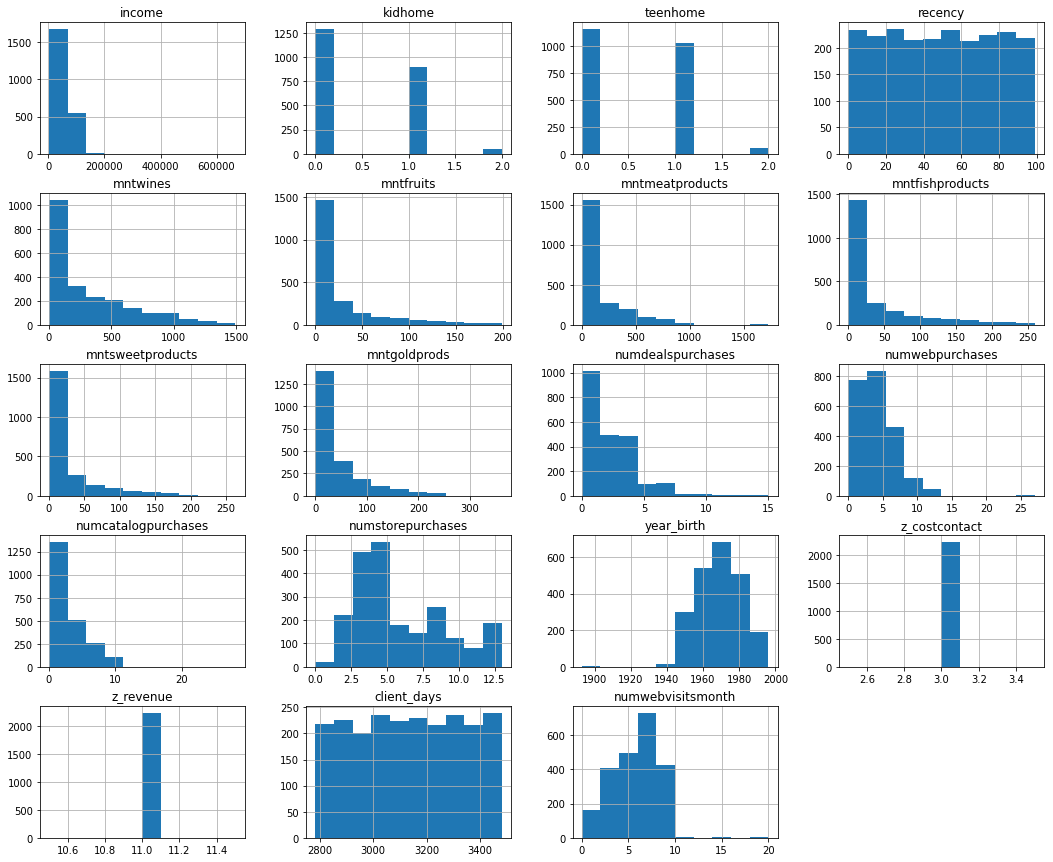

In [63]:
plot_data(df, continuos_columns, 'Continuos data')

Categorical data
['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'response', 'education', 'marital_status']


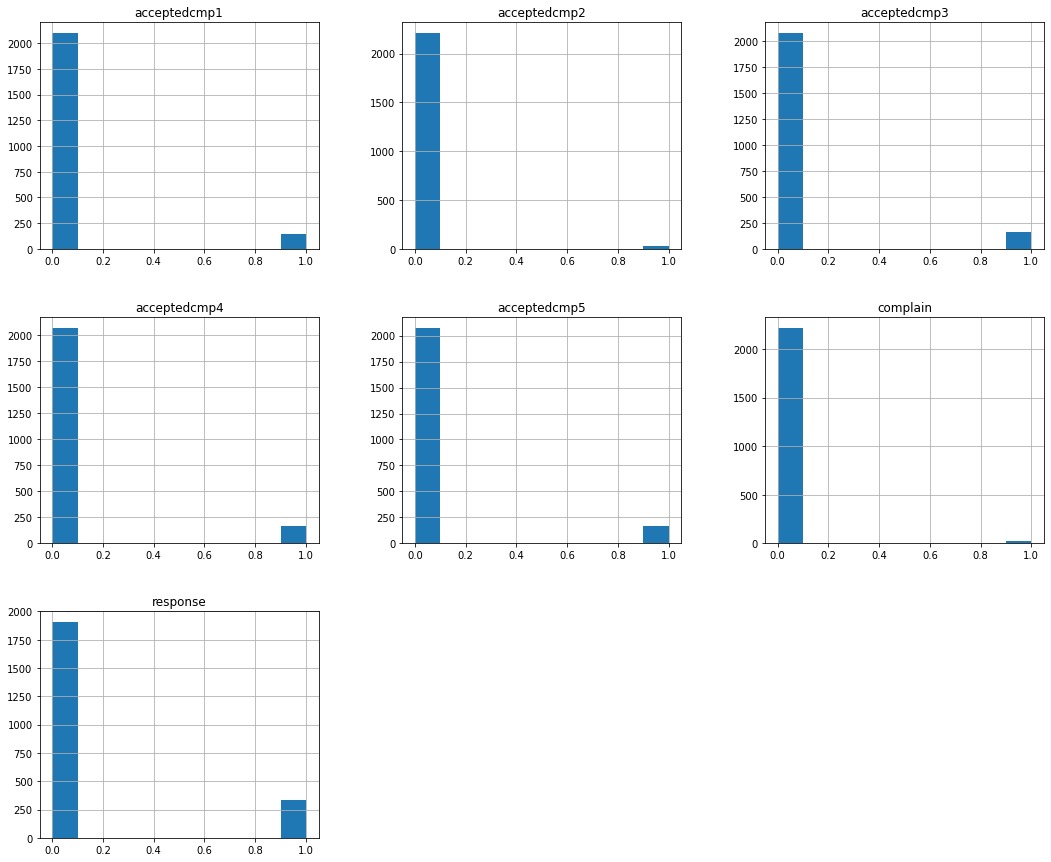

In [64]:
plot_data(df, categorical_columns, 'Categorical data')

### Success campaing rate

In [37]:
success = (len(df[df.response==1].index)/len(df))*100
round(success, 2)

14.91

In [41]:
df.columns.values

array(['id', 'year_birth', 'education', 'marital_status', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain',
       'z_costcontact', 'z_revenue', 'response', 'date_customer', 'age',
       'current_date', 'client_days'], dtype=object)

### Variables correlation

<AxesSubplot:>

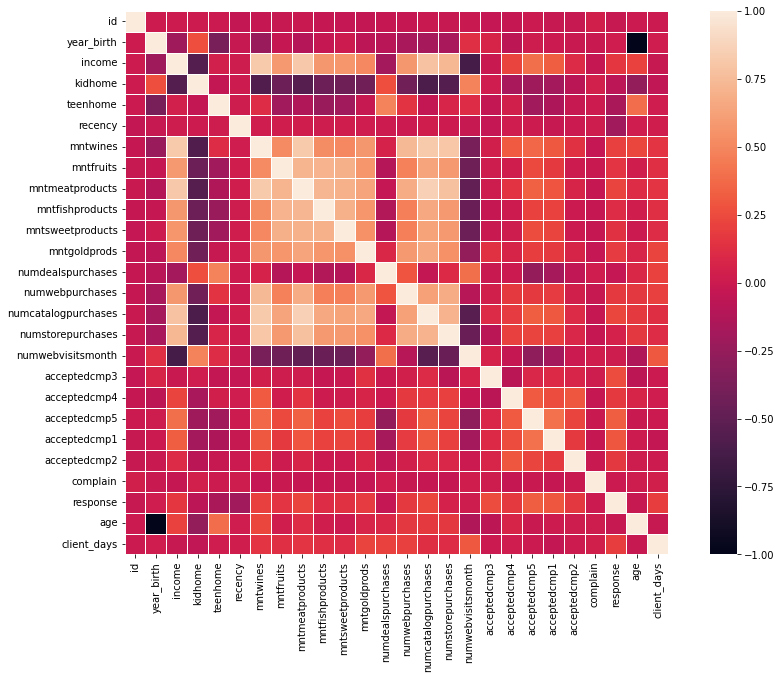

In [53]:
correlation = df.drop(['z_costcontact', 'z_revenue'], axis=1).corr(method='spearman')
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, vmax=1, square=True, linewidths=.5)